The cold plasma dielectric tensor is defined as :
$$
\mathbf{K}
=
\left(
\begin{array}{ccc}
S & j D & 0 \\
-j D & S & 0 \\
0 & 0 & P
\end{array}
\right)
$$
where
$$
\begin{eqnarray}
S &=& 1 - \sum_s \frac{\omega_{p,s}^2}{\omega^2 - \Omega_{c,s}^2} \\
D &=& \sum_s \frac{\Omega_{c,s}}{\omega} \frac{\omega_{p,s}^2}{\omega^2 - \Omega_{c,s}^2} \\
P &=& 1 - \sum_s \frac{\omega_{p,s}^2}{\omega^2}
\end{eqnarray}
$$

where $\omega$ is the RF angular frequency ($\omega=2\pi f$) and $\Omega_{c,s}$, $\omega_{p,s}$ are the cyclotron and the plasma  angular frequencies respectively for the plasma species $s$. 

In [1]:
%matplotlib notebook
import sys
# import the (git version of) PlasmaPy module which is not my global python path
sys.path.append('../../PlasmaPy')
from plasmapy.physics.dielectric import cold_plasma_permittivity_SDP
from astropy import units as u
from plasmapy.constants import pi
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# RF angular Frequency
omega_RF = 2*pi*50e6*(u.rad/u.s) # pay attention to the unit in rad/s!
# Electron and ion density
ns = [1e18, 1e18]/u.m**3
# Magnetic field
B0 = 2*u.T

S, D, P = cold_plasma_permittivity_SDP(B=B0, species=['e', 'D+'], n=ns, omega=omega_RF)
print(S, D, P)

-8.661091784715325 31.754325333352067 -32254.33974279528


In [3]:
# Plot the S,D,P coefficients vs density at the edge (supposed constant first), for various magnetic field
ns = np.logspace(17, 19, 50)/u.m**3 
Bs = [2, 4]*u.T

In [4]:
S_B1, D_B1, P_B1 = cold_plasma_permittivity_SDP(B=Bs[0], species=['e', 'D+'], n=[ns, ns], omega=omega_RF)
S_B2, D_B2, P_B2 = cold_plasma_permittivity_SDP(B=Bs[1], species=['e', 'D+'], n=[ns, ns], omega=omega_RF)

<IPython.core.display.Javascript object>


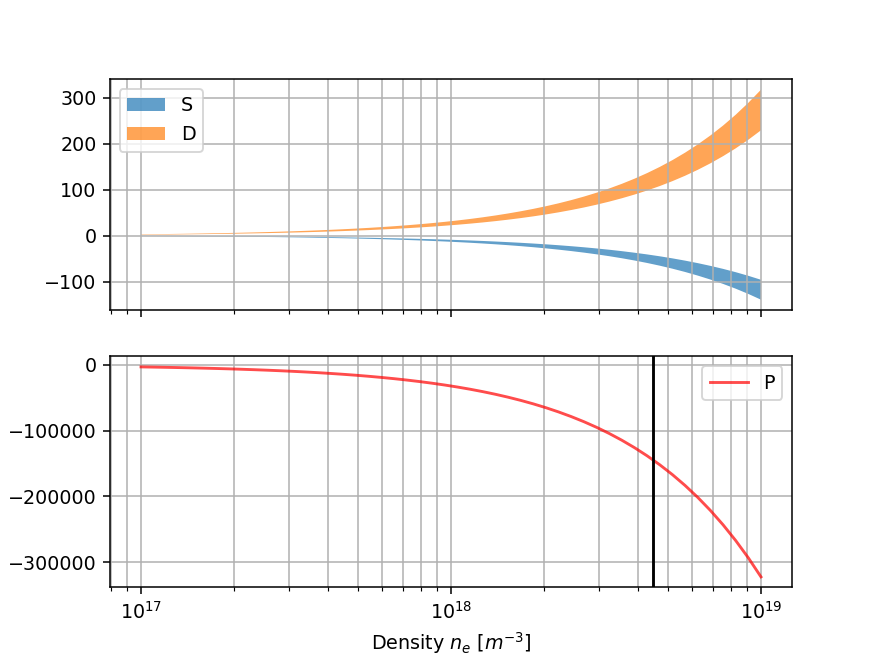

In [8]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].fill_between(ns, S_B1, S_B2, alpha=0.7)
ax[0].fill_between(ns, D_B1, D_B2, alpha=0.7)
ax[0].set_xscale('log')
ax[0].legend( ['S', 'D'], loc='upper left')
ax[0].grid(True)
ax[0].grid(True, which='minor')

ax[1].plot(ns, P_B1, alpha=0.7, color='r')
ax[1].set_xscale('log')
ax[1].legend(['P'])
ax[1].grid(True)
ax[1].grid(True, which='minor')
ax[1].set_xlabel('Density $n_e$ [$m^{-3}$]')
ax[1].axvline(4.5e18, color='k')

In [6]:
ax[1].plot(ns, P_B2)